교재8장 심화문제

8.1

sklearn에서 제공하는 붓꽃 데이터를 입력으로 하여 Versicolor, Setosa, Virginica 3종의 품종을 구분하는 심층 신경망을 구성하라.

1)  

제공되는 150개의 입력 데이터에 대하여 70%를 훈련용 데이터로 사용하고 30%를 테스트용 데이터로 사용하라.  
훈련용 데이터의 형태와 레이블, 테스트용 데이터의 형태와 레이블의 shape을 출력하라.  
마지막으로 개별 훈련 데이터의 형태도 출력하라.

In [40]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# sklearn에서 제공하는 붓꽃 데이터 로드
iris = load_iris()

# 입력 데이터와 레이블 분할
X = iris.data
y = iris.target

# 70%를 훈련용 데이터로 30%를 테스트용 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# 훈련용 데이터의 형태와 레이블의 shape 출력
print("훈련용 데이터의 형태 :", X_train.shape)
print("훈련용 데이터의 레이블 형태 :", y_train.shape)

# 테스트용 데이터의 형태와 레이블의 shape 출력
print("테스트용 데이터의 형태 :", X_test.shape)
print("테스트용 데이터의 레이블 형태 :", y_test.shape)

# 개별 훈련 데이터의 형태 출력
print("개별 훈련 데이터의 형태 :", X_train[0].shape)

훈련용 데이터의 형태 : (105, 4)
훈련용 데이터의 레이블 형태 : (105,)
테스트용 데이터의 형태 : (45, 4)
테스트용 데이터의 레이블 형태 : (45,)
개별 훈련 데이터의 형태 : (4,)


2) 

꽃받침의 길이와 너비 및 꽃잎의 길이와 너비와 같은 4개의 값을 입력층의 입력으로 가지도록 하여라.  

In [41]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

# 신경망 모델 생성
model = Sequential(Flatten(input_shape = (4, )))    # 개별 훈련 데이터의 형태가 4개이기 때문에 이들이 각각 꽃받침의 길이와 너비 및 꽃잎의 길이와 너비를 의미한다는 것을 알수 있다.
                                                    # 그래서 그대로 4개의 값을 입력층의 입력으로 가지도록 지정해준다.

3)  

64개의 노드를 가지는 하나의 은닉층 노드를 만들어라.

In [42]:
# 은닉층 생성 (64개의 노드를 가짐)
model.add(Dense(64, activation='relu'))             # relu 활성화함수 사용

# 출력층 생성 (Versicolor, Setosa, Virginica 3종의 품종을 구분해야하기 때문에 3개의 값을 output으로 출력하도록 지정)
model.add(Dense(3, activation='softmax'))           # softmax 활성화함수 사용

4)   

손실 함수는 sparse_categorical_crossentropy, 최적화 함수는 adam 최적화, 정확도는 accuracy 값을 가지도록 하라.

In [43]:
# 학습을 위해 손실 함수는 sparse_categorical_crossentropy, 최적화 함수는 adam 최적화, 모델 평가 지표는 accuracy 값을 가지도록 하여 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

5)  

모델을 훈련시킬때 배치의 크기는 5, 에폭의 수는 30으로 두어라.

In [44]:
history = model.fit(X_train, y_train, epochs=30, batch_size=5)        # 차후에 각 에폭 단계별 손실 값의 변화와 정확도 값의 변화를 출력하기 위해 history 값 저장

Epoch 1/30
21/21 [==============================] - 1s 2ms/step - loss: 1.0734 - accuracy: 0.3714
Epoch 2/30
21/21 [==============================] - 0s 2ms/step - loss: 0.9097 - accuracy: 0.5714
Epoch 3/30
21/21 [==============================] - 0s 2ms/step - loss: 0.8058 - accuracy: 0.6667
Epoch 4/30
21/21 [==============================] - 0s 2ms/step - loss: 0.7344 - accuracy: 0.8571
Epoch 5/30
21/21 [==============================] - 0s 2ms/step - loss: 0.6641 - accuracy: 0.7048
Epoch 6/30
21/21 [==============================] - 0s 2ms/step - loss: 0.6131 - accuracy: 0.7714
Epoch 7/30
21/21 [==============================] - 0s 2ms/step - loss: 0.5730 - accuracy: 0.8095
Epoch 8/30
21/21 [==============================] - 0s 2ms/step - loss: 0.5369 - accuracy: 0.8381
Epoch 9/30
21/21 [==============================] - 0s 2ms/step - loss: 0.5069 - accuracy: 0.9429
Epoch 10/30
21/21 [==============================] - 0s 3ms/step - loss: 0.4794 - accuracy: 0.9524
Epoch 11/30
21/21 [

6)  

이전 과정을 통해 만든 순차 신경망 모델을 통해 테스트 데이터에 대한 모델의 분류를 위한 학습을 하라.  
이때, 정확도는 90%이상이 되도록 하이퍼파라미터를 튜닝하여라.

In [45]:
# 테스트 데이터에 대한 모델의 분류를 위한 학습

print("신경망 모델의 학습 결과 :")
loss, accuracy = model.evaluate(X_test,y_test)      # 차후에 각 에폭 단계별 손실 값의 변화와 정확도 값의 변화를 출력하기 위해 loss, accuracy 값 저장
print("붓꽃 데이터의 분류 정확도 :", accuracy)

신경망 모델의 학습 결과 :
2/2 [==============================] - 0s 7ms/step - loss: 0.2165 - accuracy: 0.9333
붓꽃 데이터의 분류 정확도 : 0.9333333373069763


7)  

사용된 하이퍼 파라미터를 구체적으로 적어라.

데이터 분할 : 훈련용 데이터 70%, 테스트용 데이터 30%  
입력층 노드 개수 : 4  
은닉층 활성화 함수: relu  
은닉층 노드 개수: 64  
출력층 활성화 함수: softmax  
출력층 노드 개수: 3  
손실 함수: sparse_categorical_crossentropy  
최적화 함수: adam  
모델 평가 지표 : accuracy  
배치 크기: 5  
학습 횟수(epoch): 30  

8)  

각 에폭 단계별 손실 값의 변화와 정확도 값의 변화를 출력하라.

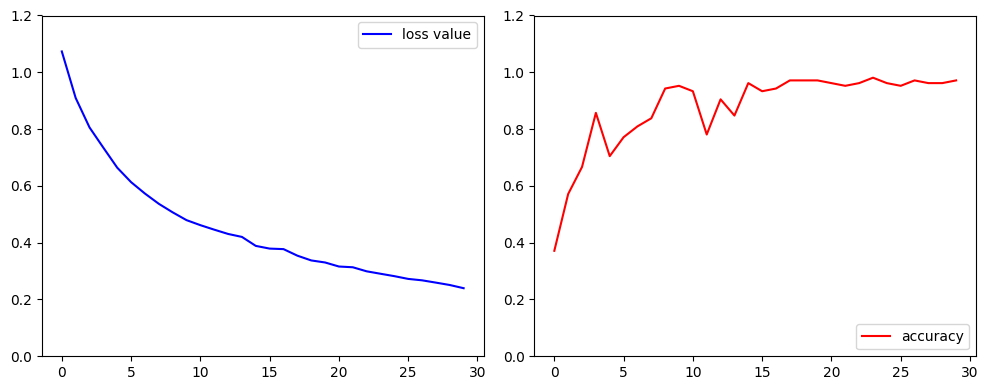

In [46]:
import matplotlib.pyplot as plt

# 그래프 크기 설정
plt.figure(figsize=(10, 4))

# 손실 값의 변화를 보여주는 plot 출력
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b', label="loss value")      # history 객체에서 loss 값을 추출하여 사용
plt.ylim(0,1.2)                                                 # y축 출력 범위 지정
plt.legend(loc='upper right')                                   # 범례 표시 (우측 상단)

# 정확도 값의 변화를 보여주는 plot 출력
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'r', label="accuracy")    # history 객체에서 accuracy 값을 추출하여 사용
plt.ylim(0,1.2)                                                 # y축 출력 범위 지정
plt.legend(loc='lower right')                                   # 범례 표시 (우측 하단)

plt.tight_layout()                                              # 그래프 간 여백 자동 조정
plt.show()

9)  

이전 과정을 통해 만든 순차 네트워크에 드롭아웃을 사용하여 네트워크의 성능을 개선시킬 수 있는지 확인하라.  
드롭아웃 비율은 각각 20%와 30%로 한 다음 붓꽃 데이터의 분류 정확도를 출력하라.

In [47]:
from keras.layers import Dropout

# 신경망 모델 생성
model_drop_20 = Sequential(Flatten(input_shape = (4, )))    # 입력층의 입력으로 4개의 값을 가지도록 지정

# 은닉층 생성 (64개의 노드를 가짐)
model_drop_20.add(Dense(64, activation='relu'))             # relu 활성화 함수 사용

# 드롭아웃 비율 20% 지정
model_drop_20.add(Dropout(0.2))

# 출력층 생성 (Versicolor, Setosa, Virginica 3종의 품종을 구분해야하기 때문에 3개의 값을 output으로 출력하도록 지정)
model_drop_20.add(Dense(3, activation='softmax'))           # softmax 활성화 함수 사용

# 학습을 위해 손실 함수는 sparse_categorical_crossentropy, 최적화 함수는 adam 최적화, 모델 평가 지표는 accuracy 값을 가지도록 하여 컴파일
model_drop_20.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_drop_20 = model_drop_20.fit(X_train, y_train, epochs=30, batch_size=5)        # 차후에 각 에폭 단계별 손실 값의 변화와 정확도 값의 변화를 출력하기 위해 history 값 저장

Epoch 1/30
21/21 [==============================] - 1s 2ms/step - loss: 1.6049 - accuracy: 0.3619
Epoch 2/30
21/21 [==============================] - 0s 2ms/step - loss: 1.2488 - accuracy: 0.3524
Epoch 3/30
21/21 [==============================] - 0s 2ms/step - loss: 1.0488 - accuracy: 0.4381
Epoch 4/30
21/21 [==============================] - 0s 3ms/step - loss: 1.0009 - accuracy: 0.5238
Epoch 5/30
21/21 [==============================] - 0s 2ms/step - loss: 0.8863 - accuracy: 0.6286
Epoch 6/30
21/21 [==============================] - 0s 2ms/step - loss: 0.8590 - accuracy: 0.6571
Epoch 7/30
21/21 [==============================] - 0s 2ms/step - loss: 0.7004 - accuracy: 0.7429
Epoch 8/30
21/21 [==============================] - 0s 2ms/step - loss: 0.6722 - accuracy: 0.7238
Epoch 9/30
21/21 [==============================] - 0s 2ms/step - loss: 0.7621 - accuracy: 0.6762
Epoch 10/30
21/21 [==============================] - 0s 2ms/step - loss: 0.6730 - accuracy: 0.7048
Epoch 11/30
21/21 [

In [48]:
# 신경망 모델 생성
model_drop_30 = Sequential(Flatten(input_shape = (4, )))    # 입력층의 입력으로 4개의 값을 가지도록 지정

# 은닉층 생성 (64개의 노드를 가짐)
model_drop_30.add(Dense(64, activation='relu'))             # relu 활성화 함수 사용

# 드롭아웃 비율 30% 지정
model_drop_30.add(Dropout(0.3))

# 출력층 생성 (Versicolor, Setosa, Virginica 3종의 품종을 구분해야하기 때문에 3개의 값을 output으로 출력하도록 지정)
model_drop_30.add(Dense(3, activation='softmax'))           # softmax 활성화 함수 사용

# 학습을 위해 손실 함수는 sparse_categorical_crossentropy, 최적화 함수는 adam 최적화, 모델 평가 지표는 accuracy 값을 가지도록 하여 컴파일
model_drop_30.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_drop_30 = model_drop_30.fit(X_train, y_train, epochs=30, batch_size=5)        # 차후에 각 에폭 단계별 손실 값의 변화와 정확도 값의 변화를 출력하기 위해 history 값 저장

Epoch 1/30
21/21 [==============================] - 1s 4ms/step - loss: 1.3394 - accuracy: 0.3333
Epoch 2/30
21/21 [==============================] - 0s 2ms/step - loss: 1.0037 - accuracy: 0.5143
Epoch 3/30
21/21 [==============================] - 0s 3ms/step - loss: 0.9128 - accuracy: 0.5905
Epoch 4/30
21/21 [==============================] - 0s 3ms/step - loss: 0.8551 - accuracy: 0.6190
Epoch 5/30
21/21 [==============================] - 0s 3ms/step - loss: 0.8465 - accuracy: 0.6476
Epoch 6/30
21/21 [==============================] - 0s 2ms/step - loss: 0.6381 - accuracy: 0.8476
Epoch 7/30
21/21 [==============================] - 0s 2ms/step - loss: 0.7031 - accuracy: 0.7048
Epoch 8/30
21/21 [==============================] - 0s 3ms/step - loss: 0.6920 - accuracy: 0.6857
Epoch 9/30
21/21 [==============================] - 0s 2ms/step - loss: 0.6223 - accuracy: 0.7619
Epoch 10/30
21/21 [==============================] - 0s 3ms/step - loss: 0.5399 - accuracy: 0.8000
Epoch 11/30
21/21 [

In [49]:
# 테스트 데이터에 대한 모델의 분류를 위한 학습

print("신경망 모델의 학습 결과 :")
loss_drop_20, accuracy_drop_20 = model_drop_20.evaluate(X_test,y_test)      # 차후에 각 에폭 단계별 손실 값의 변화와 정확도 값의 변화를 출력하기 위해 loss, accuracy 값 저장
print("붓꽃 데이터의 분류 정확도 (드롭아웃 비율 20%) :", accuracy_drop_20)
print()

print("신경망 모델의 학습 결과 :")
loss_drop_30, accuracy_drop_30 = model_drop_30.evaluate(X_test,y_test)      # 차후에 각 에폭 단계별 손실 값의 변화와 정확도 값의 변화를 출력하기 위해 loss, accuracy 값 저장
print("붓꽃 데이터의 분류 정확도 (드롭아웃 비율 30%) :", accuracy_drop_30)

신경망 모델의 학습 결과 :
2/2 [==============================] - 0s 11ms/step - loss: 0.2818 - accuracy: 0.9556
붓꽃 데이터의 분류 정확도 (드롭아웃 비율 20%) : 0.9555555582046509

신경망 모델의 학습 결과 :
2/2 [==============================] - 0s 8ms/step - loss: 0.2224 - accuracy: 0.9778
붓꽃 데이터의 분류 정확도 (드롭아웃 비율 30%) : 0.9777777791023254


10)  

3개의 은닉층을 가지는 신경망을 구축하여라.  
구축한 신경망의 훈련 정확도의 최대값과 테스트 데이터의 분류 정확도를 확인하여라.

In [50]:
# 신경망 모델 생성
model_3layer = Sequential( [
  Flatten(input_shape = (4,)),              # 입력층의 입력으로 4개의 값을 가지도록 지정
  Dense(64,activation = 'relu'),            # relu 활성화함수를 사용하는 은닉층 생성 (64개의 노드를 가짐)
  Dense(32,activation = 'relu'),            # relu 활성화함수를 사용하는 은닉층 생성 (32개의 노드를 가짐)
  Dense(10,activation = 'relu'),            # relu 활성화함수를 사용하는 은닉층 생성 (10개의 노드를 가짐)
  Dense(3,activation = 'softmax'),          # softmax 활성화함수를 사용하는 출력층 생성 (Versicolor, Setosa, Virginica 3종의 품종을 구분해야하기 때문에 3개의 값을 output으로 출력하도록 지정)
])

# 학습을 위해 손실 함수는 sparse_categorical_crossentropy, 최적화 함수는 adam 최적화, 모델 평가 지표는 accuracy 값을 가지도록 하여 컴파일
model_3layer.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_3layer = model_3layer.fit(X_train, y_train, epochs=30, batch_size=5)        # 차후에 각 에폭 단계별 손실 값의 변화와 정확도 값의 변화를 출력하기 위해 history 값 저장

Epoch 1/30
21/21 [==============================] - 1s 2ms/step - loss: 1.1128 - accuracy: 0.4000 
Epoch 2/30
21/21 [==============================] - 0s 2ms/step - loss: 0.7972 - accuracy: 0.7810
Epoch 3/30
21/21 [==============================] - 0s 2ms/step - loss: 0.6044 - accuracy: 0.9143
Epoch 4/30
21/21 [==============================] - 0s 2ms/step - loss: 0.4840 - accuracy: 0.9619
Epoch 5/30
21/21 [==============================] - 0s 2ms/step - loss: 0.3909 - accuracy: 0.9714
Epoch 6/30
21/21 [==============================] - 0s 2ms/step - loss: 0.3542 - accuracy: 0.8857
Epoch 7/30
21/21 [==============================] - 0s 2ms/step - loss: 0.3005 - accuracy: 0.8952
Epoch 8/30
21/21 [==============================] - 0s 2ms/step - loss: 0.2558 - accuracy: 0.9333
Epoch 9/30
21/21 [==============================] - 0s 2ms/step - loss: 0.2200 - accuracy: 0.9524
Epoch 10/30
21/21 [==============================] - 0s 2ms/step - loss: 0.2210 - accuracy: 0.9333
Epoch 11/30
21/21 

In [51]:
# 테스트 데이터에 대한 모델의 분류를 위한 학습

print("신경망 모델의 학습 결과 :")
loss_3layer, accuracy_3layer = model_3layer.evaluate(X_test,y_test)      # 차후에 각 에폭 단계별 손실 값의 변화와 정확도 값의 변화를 출력하기 위해 loss, accuracy 값 저장
print("훈련 정확도 최대값 :",max(history_3layer.history['accuracy']))
print("테스트 데이터의 분류 정확도 :", accuracy_3layer)

신경망 모델의 학습 결과 :
2/2 [==============================] - 0s 9ms/step - loss: 0.0449 - accuracy: 1.0000
훈련 정확도 최대값 : 0.9809523820877075
테스트 데이터의 분류 정확도 : 1.0
